## Linear Regression Project

An Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [1]:
# Import pandas, numpy, matplotlib,and seaborn. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [2]:
customers=pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


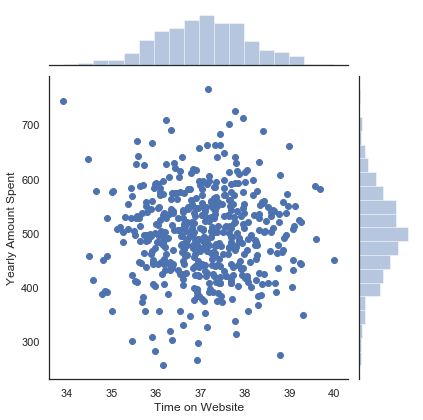

In [24]:
# Exploratory Data Analysis

# Checking yearly how much time customers have spent on website

sns.set(style="white")
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

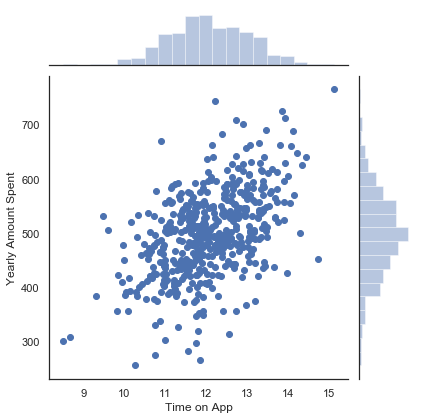

In [25]:
# Checking yearly how much time customers have spent on App

sns.set(style="white")
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

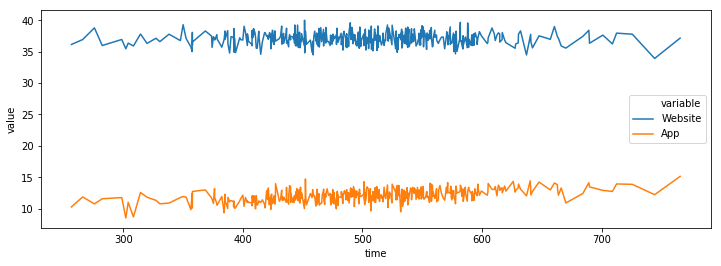

In [35]:
# Now will compare here between time spent on App & Website

plt.figure(figsize=(12,4))
data=pd.DataFrame({'time': customers['Yearly Amount Spent'], 
                   'Website': customers['Time on Website'],
                   'App': customers['Time on App'] })

sns.lineplot(x='time',y='value', hue='variable', data=pd.melt(data,['time']))

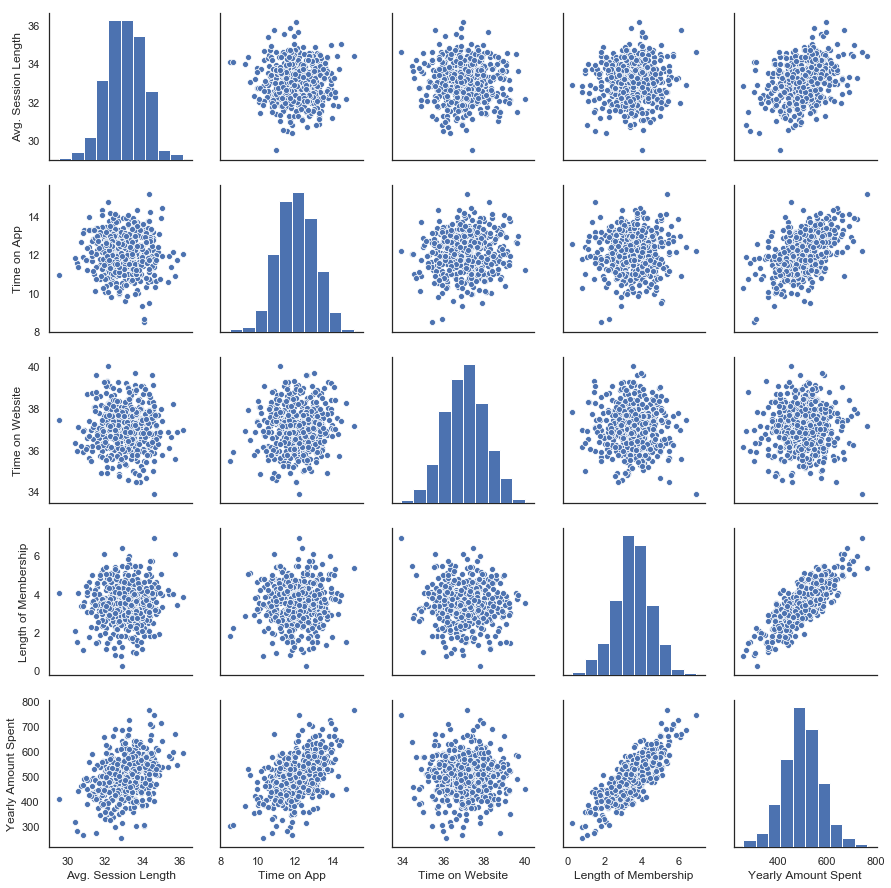

In [30]:
sns.pairplot(customers)

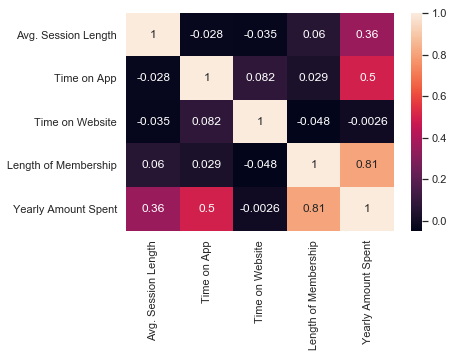

In [32]:
# From above pic 'Yearly Amount Spent' is highly positively corelated with 'Length of membership'
# The same we can get by using heatmap (visualizing corelation matrix)

sns.heatmap(customers.corr(),annot=True)

Now we've explored the data, let's go ahead and split the data into training and testing sets.
Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [23]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [25]:
# importing sklearn
from sklearn.model_selection import train_test_split

In [26]:
# setting test size as 30% of entire data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm=LinearRegression()

In [29]:
# Now we need to train our model with training data

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [31]:
# Now we will be predicting our test data
predictions=lm.predict(X_test)

Text(0,0.5,'Predicted Y')

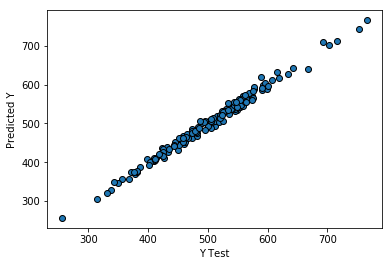

In [32]:
# Creating a scatterplot of the real test values versus the predicted values.
plt.scatter(predictions,y_test,edgecolor='black')
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

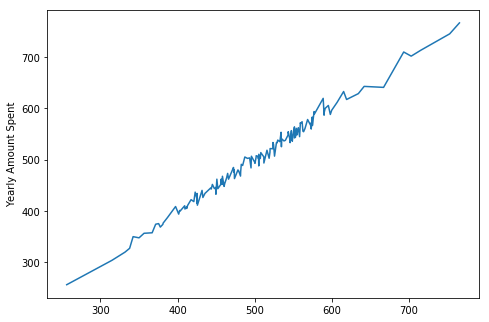

In [34]:
# Creating a lineplot of the real test values versus the predicted values as from scatter plot it's
# not clear
sns.lineplot(x=predictions,y=y_test)

In [85]:
# Now we need to evaluate the model's performance by calculating - 
# Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,predictions)
MSE=metrics.mean_squared_error(y_test,predictions)
RMSE=np.sqrt(MSE)
print("MAE = ",MAE,"MSE = ",MSE,"RMSE = ",RMSE)

MAE =  7.228148653430853 MSE =  79.81305165097487 RMSE =  8.933815066978656


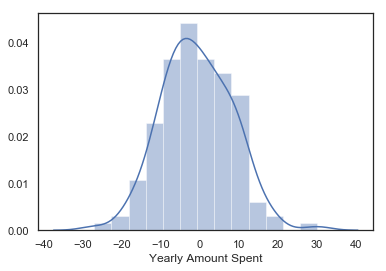

In [87]:
# Now we need to check the residuals by generating a histogram of it

sns.distplot(y_test-predictions)
# As it looks like normally distributed, so it's great 

In [89]:
# we are going to see here the coefficients of each numerical features
cdf=pd.DataFrame(lm.coef_,X.columns,columns=["Coefficient"])
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
#Interpreting the coefficients:

#Holding all other features fixed, 

# a 1 unit increase in 'Avg. Session Length' is associated with an increase of 25.98 total dollars spent.
# a 1 unit increase in 'Time on App' is associated with an increase of 38.59 total dollars spent.
# a 1 unit increase in 'Time on Website' is associated with an increase of 0.19 total dollars spent.
# a 1 unit increase in 'Length of Membership' is associated with an increase of 61.27 total dollars spent.

Now we have seen previously from visualization and the descriptive statistics that customers are spending more time on Website instead of app.
And also from this coefficients, it's clear that 1 unit increase in 'Time on Website' (considering all others factors' are constant) is associated with an increase of 0.19 total dollars spent.
So definitely customers want to spend more time on Website compare to app. So, the E-commerce company should focus more on Website than app.

Additionally, from human psychology customers are very comfortable doing their shopping from Computer as they can see broader picture (same kind of different items, price comparison with other items, reviews' of other customers, & how it looks like etc.). Though customers can browse from mobile app, but they prefer to shop from website.

But still this conclusion depends on other data/features as well. Now, what data we got, from there we can conclude "COMPANY SHOULD FOCUS MORE ON WEBSITE".